In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

# Data Analysis

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


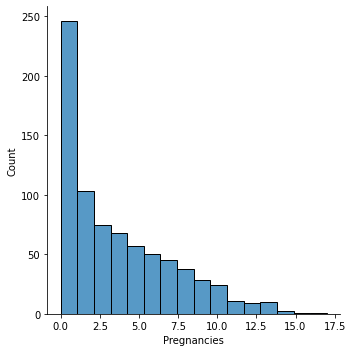

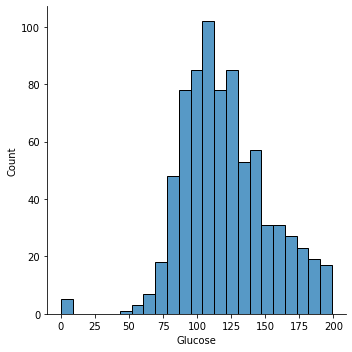

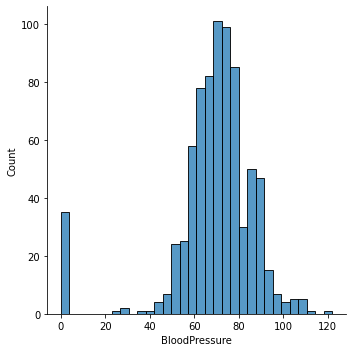

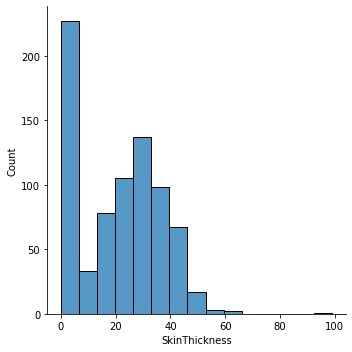

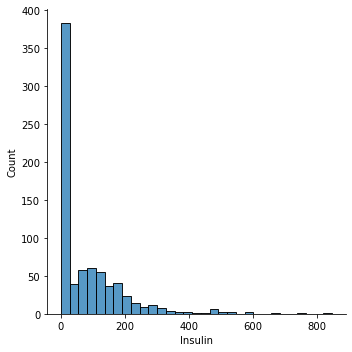

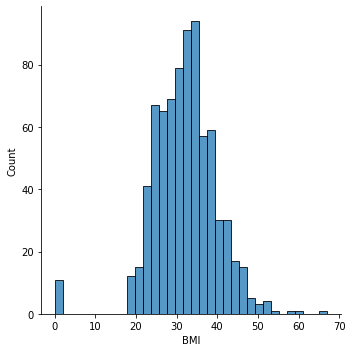

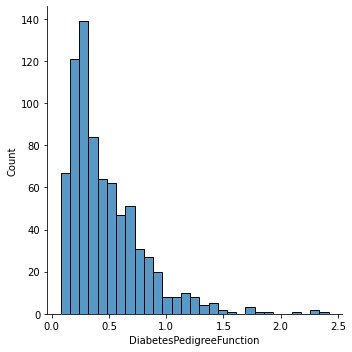

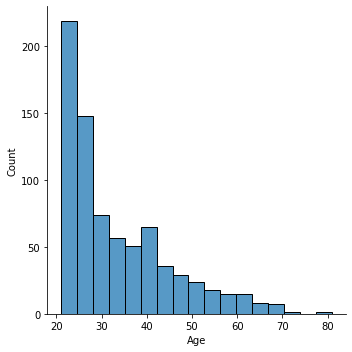

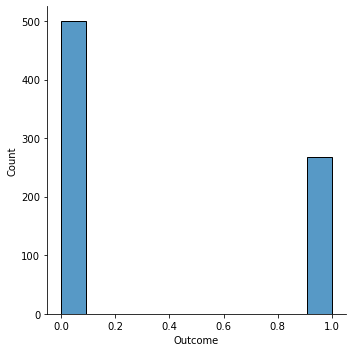

In [8]:
for column in data :
    sns.displot(data[column])


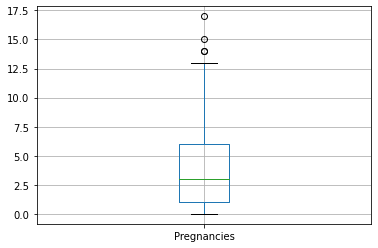

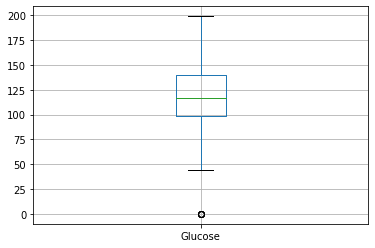

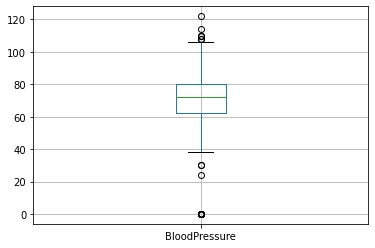

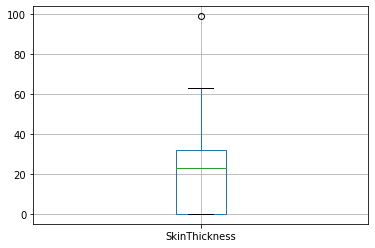

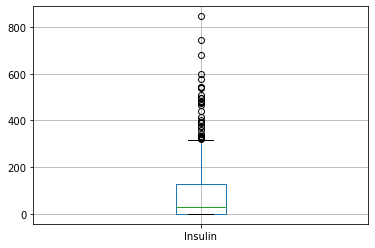

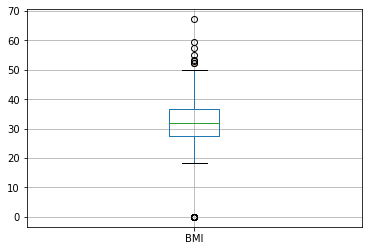

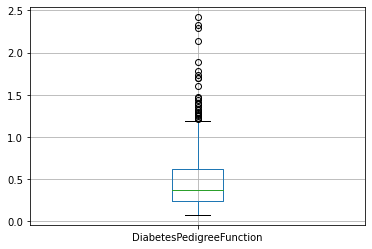

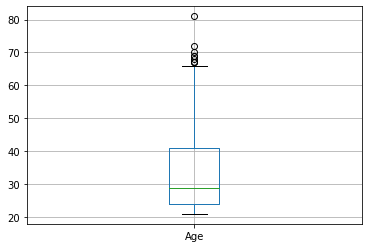

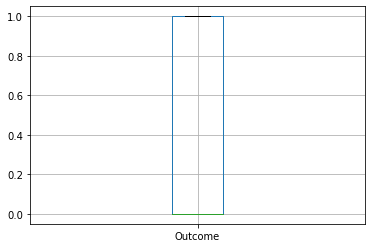

In [9]:
for column in data :
    plt.figure()
    data.boxplot([column])

In [10]:
y=data['Outcome']
X=data.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Data Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

# Model optimisation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,stratify=y,random_state=5)

In [15]:
from sklearn.svm import SVC  

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C':[0.1,1, 10, 100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear']}
grid=GridSearchCV(SVC(),param_grid,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']})

In [18]:
grid.best_score_

0.7768226042916168

In [19]:
model=grid.best_estimator_
model

SVC(C=10, gamma=1, kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score,recall_score

In [21]:
X_train_pred=model.predict(X_train)
X_test_pred=model.predict(X_test)
accuracy_score(y_train,X_train_pred)

0.7947882736156352

In [22]:
accuracy_score(y_test,X_test_pred)

0.7597402597402597

In [23]:
recall_score(y_test,X_test_pred)

0.5370370370370371